In [90]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt

In [91]:
# Lognormal(0, 1)

param = 1  # sigma^2
amount = 1000

rv = sts.lognorm(param)

# Lognormal($\mu = 0$, $\sigma^2 = 1$)

### mean = $e^{(\mu + \frac{\sigma^2}{2})} = e^{0.5} \approx 1.649$
### variance = $(e^{\sigma^2} - 1)e^{2\mu + \sigma^2} = (e - 1)e \approx 4.671$

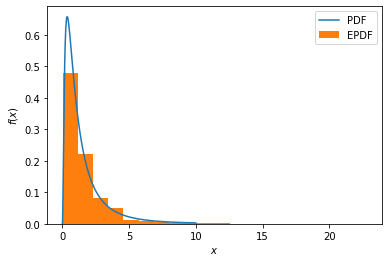

In [92]:
# Draw hist and PDF of the Lognormal(0, 1)

x = np.linspace(0, 10, 1000)

plt.plot(x, rv.pdf(x), label="PDF")
plt.hist(rv.rvs(amount), bins=20, density=True, label="EPDF")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

# CLT: $\overline{X}_n \approx$~ $N(EX, \frac{DX}{n}) $
# $EX \approx 1.649$
# $DX \approx 4.671$



* N = 5   
$\overline{X}_{5} \approx$~ $N(1.649, 0.934)$


* N = 10   
$\overline{X}_{10} \approx$~ $N(1.649, 0.467)$



* N = 50   
$\overline{X}_{50} \approx$~ $N(1.649, 0.093)$



* N = 100   
$\overline{X}_{100} \approx$~ $N(1.649, 0.047)$

In [93]:
# Create dict of the emperical means

n_array = [5, 10, 50, 100]
means_dict = { n: [np.mean(rv.rvs(n)) for _ in range(1000)] for n in n_array }

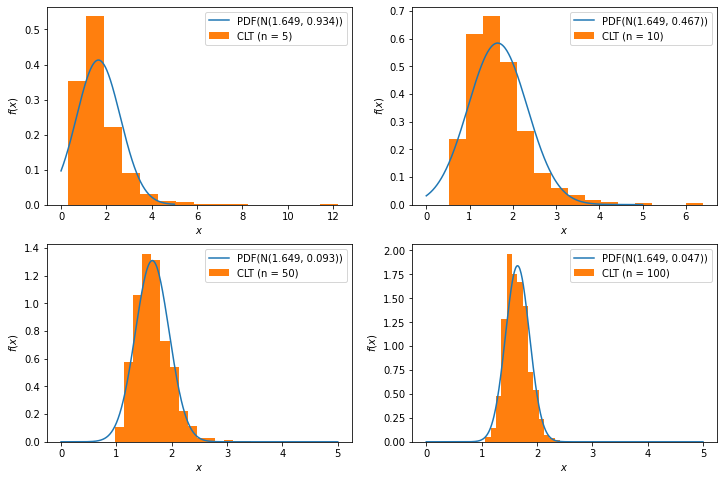

In [94]:
# Draw hists & PDFs

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(np.linspace(0, 5, 500), sts.norm(1.649, np.sqrt(0.934)).pdf(np.linspace(0, 5, 500)), label="PDF(N(1.649, 0.934))")
axes[0, 0].hist(means_dict[5], bins=15, density=True, label=f"CLT (n = 5)")

axes[0, 1].plot(np.linspace(0, 5, 500), sts.norm(1.649, np.sqrt(0.467)).pdf(np.linspace(0, 5, 500)), label="PDF(N(1.649, 0.467))")
axes[0, 1].hist(means_dict[10], bins=15, density=True, label=f"CLT (n = 10)")

axes[1, 0].plot(np.linspace(0, 5, 500), sts.norm(1.649, np.sqrt(0.093)).pdf(np.linspace(0, 5, 500)), label="PDF(N(1.649, 0.093))")
axes[1, 0].hist(means_dict[50], bins=15, density=True, label=f"CLT (n = 50)")

axes[1, 1].plot(np.linspace(0, 5, 500), sts.norm(1.649, np.sqrt(0.047)).pdf(np.linspace(0, 5, 500)), label="PDF(N(1.649, 0.047))")
axes[1, 1].hist(means_dict[100], bins=15, density=True, label=f"CLT (n = 100)")

for row in axes:
    for cell in row:
        cell.set_xlabel("$x$")
        cell.set_ylabel("$f(x)$")
        cell.legend()

# Точность аппроксимации распределения выборочных средних с увеличением N также растет